In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [4]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

h:\Machine Learning\class\env\Lib\site-packages\sklearn\utils\_param_validation.py:14: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.sparse import csr_matrix, issparse


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]], shape=(868, 3))

In [6]:
reg = linear_model.LinearRegression()
predict = reg.fit(train_x_poly, train_y)

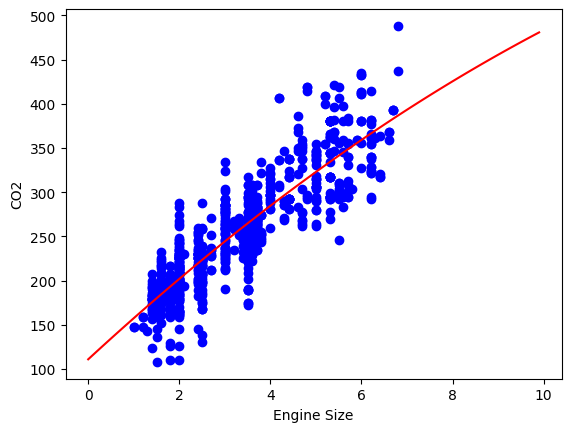

In [7]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = reg.intercept_[0] + reg.coef_[0][1]*XX + reg.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2')
plt.show()

In [15]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = reg.predict(test_x_poly)

print('R2 Score: ', r2_score(test_y, test_y_))
print("{:.2f}".format(reg.score(test_x_poly, test_y)))

R2 Score:  0.7219600163321314
0.72


# Practice for 3 degree

In [16]:
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
predict = reg.fit(train_x_poly, train_y)

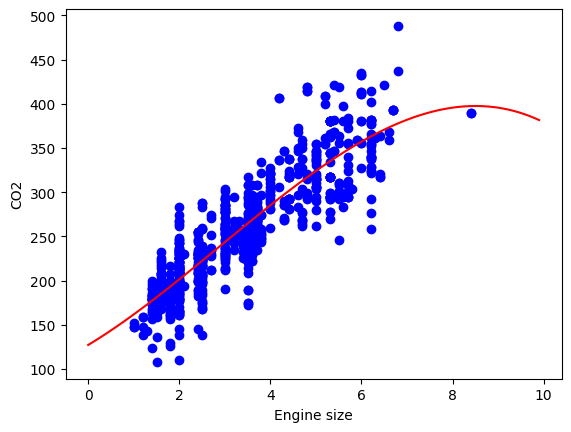

In [21]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = reg.intercept_[0] + reg.coef_[0][1]*XX + reg.coef_[0][2]*np.power(XX, 2) + reg.coef_[0][3]*np.power(XX, 3)
plt.plot(XX ,yy, '-r')
plt.xlabel('Engine size')
plt.ylabel('CO2')
plt.show()

In [19]:
test_x_poly = poly.fit_transform(test_x)
reg.score(test_x_poly, test_y)

0.7230373037976645